# Data balancing

### Count number of smells

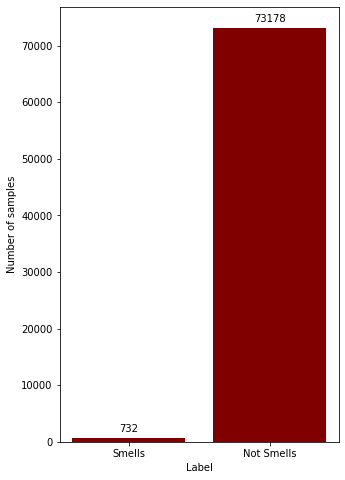

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('datasets/imputed_dataset.csv')

complex = dataset[dataset['ComplexClass'] == 1]
lazy = dataset[dataset['LazyClass'] == 1]
large = dataset[dataset['LargeClass'] == 1]
refused = dataset[dataset['RefusedBequest'] == 1]
spaghetti = dataset[dataset['SpaghettiCode'] == 1]

count_complex = len(complex)
count_lazy = len(lazy)
count_large = len(large)
count_refused = len(refused)
count_spaghetti = len(spaghetti)
count_smells = count_complex + count_lazy + count_large + count_refused + count_spaghetti


def add_value_label(x_list,y_list, k):
    for i in range(0, len(x_list)):
        plt.text(i,y_list[i]+k,y_list[i], ha="center")

types = ['Smells', 'Not Smells']
values = [count_smells,len(dataset)-count_smells ]

fig = plt.figure(figsize = (5, 8))
plt.bar(types, values, color ='maroon')
add_value_label(types,values, 1000)

plt.xlabel("Label")
plt.ylabel("Number of samples")
plt.show()

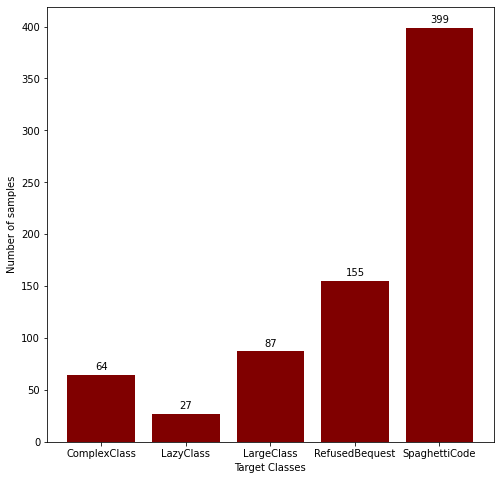

In [2]:
types = ['ComplexClass', 'LazyClass', 'LargeClass', 'RefusedBequest', 'SpaghettiCode']
values = [count_complex, count_lazy, count_large, count_refused, count_spaghetti]

fig = plt.figure(figsize = (8, 8))
plt.bar(types,values, color ='maroon')
add_value_label(types,values, 5)

plt.xlabel("Target Classes")
plt.ylabel("Number of samples")
plt.show()

In [18]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold
import os
import shutil


path = 'datasets/stratifiedKfold'
# Check whether the specified path exists or not
isExist = os.path.exists(path)
if isExist:
    shutil.rmtree(path)
os.mkdir(path)


imputed_dataset = pd.read_csv("datasets/imputed_dataset.csv")

for i in range(0,5):
    X = imputed_dataset.iloc[:, 2:-5]
    features_name = X.columns.values.tolist()
    if i != 4:
        y = imputed_dataset.iloc[:, -5+i:-4+i]
    else:
        y = imputed_dataset.iloc[:, -1:]
    class_name = y.columns.values.tolist()

    print("Features_name:", features_name )
    print("Class_name:", class_name )


    path = 'datasets/stratifiedKfold/'+class_name[0]
    # Check whether the specified path exists or not
    isExist = os.path.exists(path)
    if isExist:
        shutil.rmtree(path)
    os.mkdir(path)

    X = X.to_numpy()
    y = y.to_numpy()

    skf = StratifiedKFold(n_splits=10)
    skf.get_n_splits(X, y)

    print(skf)

    counter = 1
    for train_index, test_index in skf.split(X, y):

        path = 'datasets/stratifiedKfold/'+class_name[0]+'/'+str(counter)
        # Check whether the specified path exists or not
        isExist = os.path.exists(path)
        if isExist:
            shutil.rmtree(path)
        os.mkdir(path)

        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        X_train = pd.DataFrame(X_train, columns = features_name)
        X_test = pd.DataFrame(X_test, columns = features_name)
        y_train = pd.DataFrame(y_train, columns = class_name)
        y_test = pd.DataFrame(y_test, columns = class_name)

        train_set = pd.concat([X_train, y_train], axis=1)
        train_set = train_set.reset_index()  # make sure indexes pair with number of rows

        test_set = pd.concat([X_test, y_test], axis=1)
        test_set = test_set.reset_index()  # make sure indexes pair with number of rows

        train_set.to_csv(path+'/train_set.csv', index=False)
        test_set.to_csv(path+'/test_set.csv', index=False)

        counter += 1


Features_name: ['M_CBO', 'M_CYCLO', 'M_DIT', 'M_ELOC', 'M_FanIn', 'M_FanIn_1', 'M_LCOM', 'M_LOC', 'M_LOCNAMM', 'M_NOA', 'M_NOC', 'M_NOM', 'M_NOMNAMM', 'M_NOPA', 'M_PMMM', 'M_PRB', 'M_WLOCNAMM', 'M_WMC', 'M_WMCNAMM', 'M_TextualCohesion', 'M_TextualEntropy']
Class_name: ['ComplexClass']
StratifiedKFold(n_splits=10, random_state=None, shuffle=False)
Features_name: ['M_CBO', 'M_CYCLO', 'M_DIT', 'M_ELOC', 'M_FanIn', 'M_FanIn_1', 'M_LCOM', 'M_LOC', 'M_LOCNAMM', 'M_NOA', 'M_NOC', 'M_NOM', 'M_NOMNAMM', 'M_NOPA', 'M_PMMM', 'M_PRB', 'M_WLOCNAMM', 'M_WMC', 'M_WMCNAMM', 'M_TextualCohesion', 'M_TextualEntropy']
Class_name: ['LargeClass']
StratifiedKFold(n_splits=10, random_state=None, shuffle=False)
Features_name: ['M_CBO', 'M_CYCLO', 'M_DIT', 'M_ELOC', 'M_FanIn', 'M_FanIn_1', 'M_LCOM', 'M_LOC', 'M_LOCNAMM', 'M_NOA', 'M_NOC', 'M_NOM', 'M_NOMNAMM', 'M_NOPA', 'M_PMMM', 'M_PRB', 'M_WLOCNAMM', 'M_WMC', 'M_WMCNAMM', 'M_TextualCohesion', 'M_TextualEntropy']
Class_name: ['LazyClass']
StratifiedKFold(n_spl

In [22]:
dataset1 = pd.read_csv('datasets/stratifiedKfold/ComplexClass/1/test_set.csv')

complex = dataset1[dataset1['ComplexClass'] == 1]
print(len(complex), len(dataset1))


dataset2 = pd.read_csv('datasets/stratifiedKfold/ComplexClass/1/train_set.csv')

complex2 = dataset2[dataset2['ComplexClass'] == 1]
print(len(complex2), len(dataset2))

7 7391
57 66519


### Oversampling

In [3]:
import os
import shutil
from imblearn.over_sampling import SMOTE
import pandas as pd

path = 'datasets/oversampling'

# Check whether the specified path exists or not
isExist = os.path.exists(path)
if isExist:
    shutil.rmtree(path)

os.mkdir(path)


imputed_dataset = pd.read_csv("datasets/imputed_dataset.csv")

for i in range(0,5):

    X = imputed_dataset.iloc[:, 2:-5]
    features_name = X.columns.values.tolist()
    if i != 4:
        y = imputed_dataset.iloc[:, -5+i:-4+i]
    else:
        y = imputed_dataset.iloc[:, -1:]
    class_name = y.columns.values.tolist()

    print("Features_name:", features_name )
    print("Class_name:", class_name )

    X_resampled, y_resampled = SMOTE().fit_resample(X.to_numpy(), y.to_numpy())
    print("Size resampled dataset: ", len(X_resampled))

    X_res = pd.DataFrame(X_resampled, columns=features_name)
    y_res = pd.DataFrame(y_resampled, columns=class_name)

    result = pd.concat([X_res, y_res], axis=1)
    result = result.reset_index()  # make sure indexes pair with number of rows


    smells = result[result[class_name[0]] == 1]
    not_smells = result[result[class_name[0]] == 0]
    print("Count smells: ", len(smells))
    print("Count not smells: ", len(not_smells))


    print("\n==========================================\n")

    result = result.iloc[:, 1:]
    result.to_csv('datasets/oversampling/oversampling_'+class_name[0]+'.csv', index=False)

Features_name: ['M_CBO', 'M_CYCLO', 'M_DIT', 'M_ELOC', 'M_FanIn', 'M_FanIn_1', 'M_LCOM', 'M_LOC', 'M_LOCNAMM', 'M_NOA', 'M_NOC', 'M_NOM', 'M_NOMNAMM', 'M_NOPA', 'M_PMMM', 'M_PRB', 'M_WLOCNAMM', 'M_WMC', 'M_WMCNAMM', 'M_TextualCohesion', 'M_TextualEntropy']
Class_name: ['ComplexClass']
Size resampled dataset:  147692
Count smells:  73846
Count not smells:  73846


Features_name: ['M_CBO', 'M_CYCLO', 'M_DIT', 'M_ELOC', 'M_FanIn', 'M_FanIn_1', 'M_LCOM', 'M_LOC', 'M_LOCNAMM', 'M_NOA', 'M_NOC', 'M_NOM', 'M_NOMNAMM', 'M_NOPA', 'M_PMMM', 'M_PRB', 'M_WLOCNAMM', 'M_WMC', 'M_WMCNAMM', 'M_TextualCohesion', 'M_TextualEntropy']
Class_name: ['LargeClass']
Size resampled dataset:  147646
Count smells:  73823
Count not smells:  73823


Features_name: ['M_CBO', 'M_CYCLO', 'M_DIT', 'M_ELOC', 'M_FanIn', 'M_FanIn_1', 'M_LCOM', 'M_LOC', 'M_LOCNAMM', 'M_NOA', 'M_NOC', 'M_NOM', 'M_NOMNAMM', 'M_NOPA', 'M_PMMM', 'M_PRB', 'M_WLOCNAMM', 'M_WMC', 'M_WMCNAMM', 'M_TextualCohesion', 'M_TextualEntropy']
Class_name: [